In [27]:
import pandas as pd
import numpy as np
import pickle
import sklearn
import matplotlib.pyplot as plt

from pathlib import Path

In [28]:
def gradeHeatMap(df, grade, colormap='hot'):
    vmap = np.zeros((11, 18))
    gradedf = df[df['grade'] == grade]
    for hold in unique_holds:
        vmap[hold[0], hold[1]] = gradedf[f'{hold[0]}_{hold[1]}'].sum()
    plt.title(f'Hold Heatmap for V{grade}')
    plt.imshow(vmap.T[::-1], cmap=colormap, interpolation='none')
print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'G

In [29]:
# Load in the data
cwd = Path.cwd()
moondf = pickle.load(open(cwd / '..' / 'raw_data' / 'moonGen_scrape_2016_with_labels', 'rb'))
unique_holds = pickle.load(open(cwd / '..' / 'raw_data' / 'unique_holds', 'rb'))

In [4]:
moondf.head()

,0_4,0_5,0_8,0_9,0_10,0_11,0_12,0_13,0_14,0_15,...,10_9,10_10,10_11,10_12,10_13,10_15,10_17,grade,is_benchmark,repeats
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,6,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,14
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,0,18
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,125


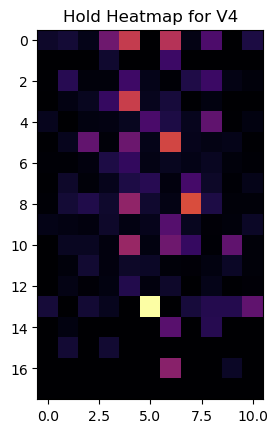

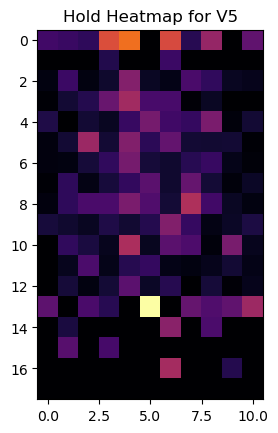

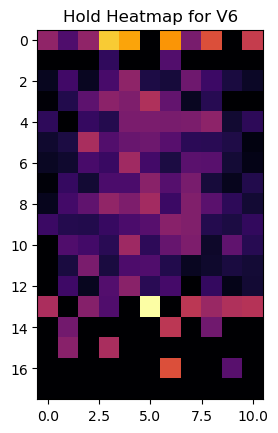

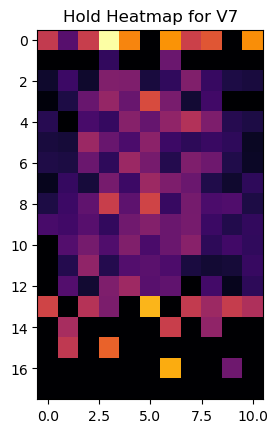

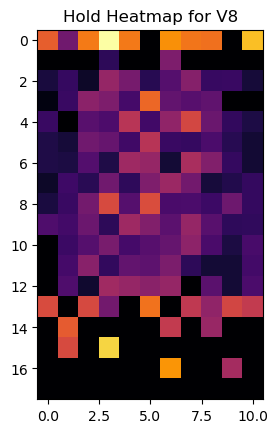

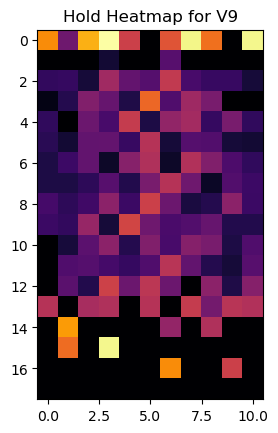

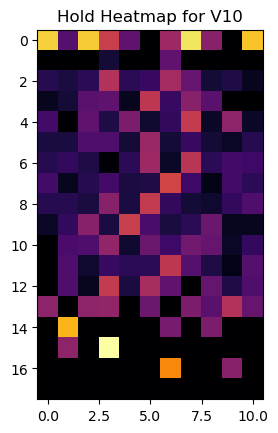

In [20]:
# Run the heatmaps for each grade
for grade in range(4, 11):
    gradeHeatMap(moondf, grade, 'inferno')
    plt.show()

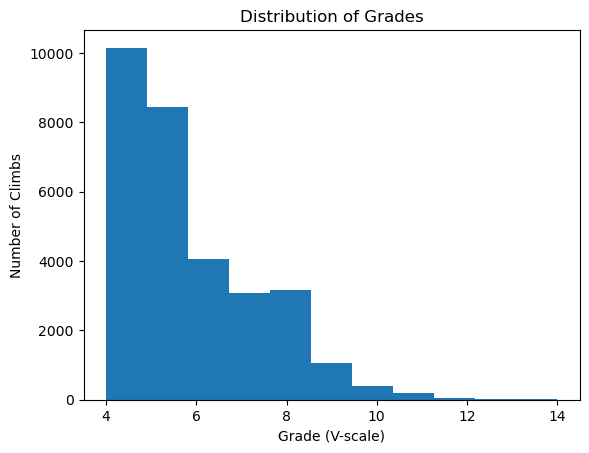

4     10153
5      8453
6      4045
8      3173
7      3074
9      1061
10      389
11      181
12       51
13       29
14       24
Name: grade, dtype: int64


In [30]:
# Show the distribution of grades
plt.hist(moondf['grade'], bins=len(moondf['grade'].value_counts()))
plt.title('Distribution of Grades')
plt.xlabel('Grade (V-scale)')
plt.ylabel('Number of Climbs')
plt.show()
print(moondf['grade'].value_counts())

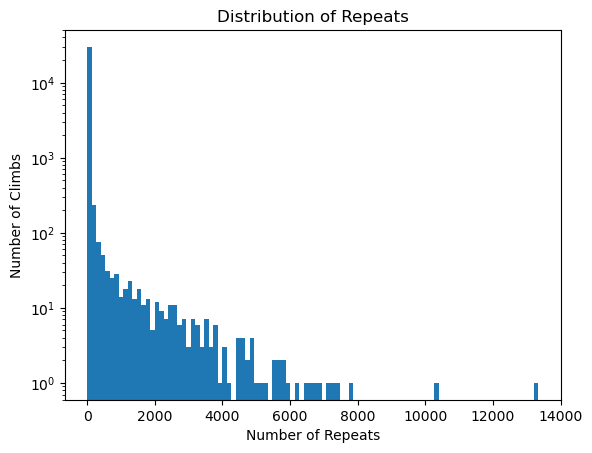

0.24816374498090296


In [26]:
# Show the distribution of grades
plt.hist(moondf['repeats'], bins=100)
plt.yscale('log')
plt.title('Distribution of Repeats')
plt.xlabel('Number of Repeats')
plt.ylabel('Number of Climbs')
plt.show()

percentage = len(moondf[moondf['repeats'] > 10]) / len(moondf)
print(percentage)

We might have to limit the data to V4-V8 or consolidate a V9+ category to make sure we have enough data for each class.

In [7]:
# Show the 5 most common holds for each grade
def MostCommonHolds(df, grade, num):
    gmap = np.zeros((11, 18))
    gradedf = df[df['grade'] == grade]
    hold_counts = []
    for hold in unique_holds:
        hold_counts.append(gradedf[f'{hold[0]}_{hold[1]}'].sum())
    hold_counts = np.array(hold_counts)
    for i in range(num):
        hold = unique_holds[np.argmax(hold_counts)]
        gmap[hold[0], hold[1]] = 1
        hold_counts[np.argmax(hold_counts)] = 0
    plt.title(f'5 Most Common Holds for V{grade}')
    plt.imshow(gmap.T[::-1], cmap='hot', interpolation='none')
    

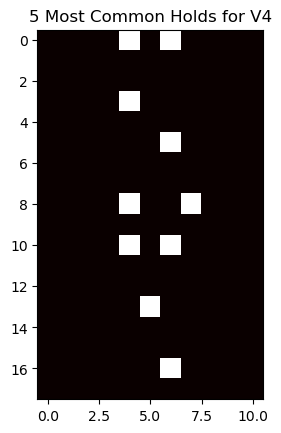

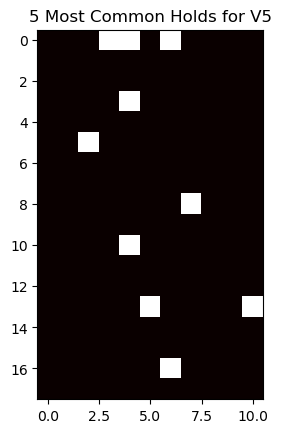

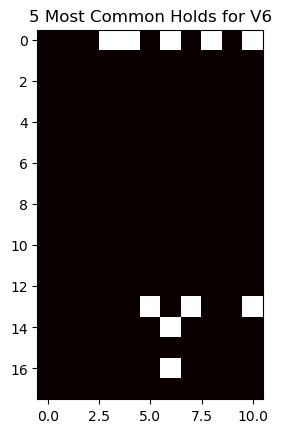

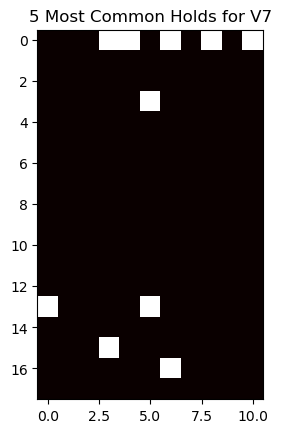

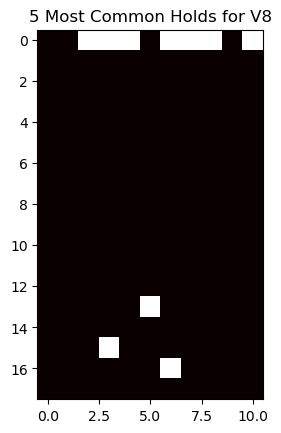

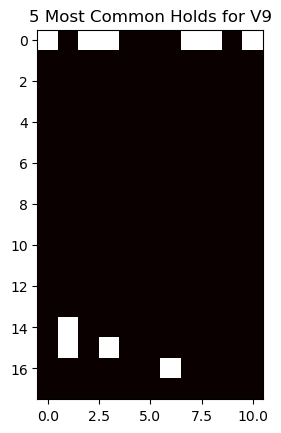

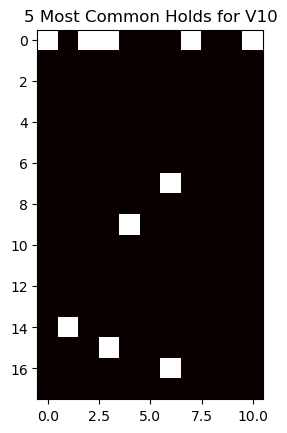

In [8]:
for i in range(4, 11):
    MostCommonHolds(moondf, i, 10)
    plt.show()